In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [42]:
import pandas as pd
dataframe=pd.read_excel("C:/Users/abdulsamet.onay/Desktop/eğitim/bilgeadam python/nihaiveri.xlsx")
dataframe

,index,unique,id,salary ($),birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,...,draft_team,draft_year,height,Unnamed: 22,height (cm),highSchool,name,position,shoots,weight (lb)
0,0,abdelal011990,abdelal01,395000,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,...,Portland Trail Blazers,1990,6,10,208.28,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240
1,3,abdulma021990,abdulma02,1660000,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,...,Denver Nuggets,1990,6,1,185.42,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162
2,4,abdulta011997,abdulta01,1226880,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,...,Sacramento Kings,1997,6,6,198.12,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223
3,5,abdursh011996,abdursh01,2186000,"December 11, 1976","Marietta, Georgia",2.5,47.2,29.7,81.0,...,Vancouver Grizzlies,1996,6,9,205.74,"Wheeler in Marietta, Georgia",Shareef Abdur-Rahim,Center and Small Forward and Power Forward,Right,225
4,10,ackeral012005,ackeral01,398762,"January 21, 1983","Compton, California",0.5,37.0,32.0,50.0,...,Detroit Pistons,2005,6,5,195.58,"Eisenhower in Rialto, California",Alex Acker,Shooting Guard,Right,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,4672,zellety012012,zellety01,1563120,"January 17, 1990","Visalia, California",0.9,50.9,28.6,76.4,...,Dallas Mavericks,2012,7,0,213.36,"Washington in Washington, Indiana",Tyler Zeller,Center,Right,253
1305,4676,zidekge011995,zidekge01,603000,"August 2, 1973","Zlin, Czech Republic",0.2,40.8,25.0,78.3,...,Charlotte Hornets,1995,7,0,213.36,"Arabska Secondary in Arabska, Czech Republic",George Zidek,Center,Right,250
1306,4678,zimmest012016,zimmest01,950000,"September 9, 1996","Hendersonville, Tennessee",0.2,32.3,0.0,60.0,...,Orlando Magic,2016,7,0,213.36,"Bishop Gorman in Las Vegas, Nevada",Stephen Zimmerman,Center,Left,240
1307,4679,zipsepa012016,zipsepa01,750000,"February 18, 1994","Heidelberg, Germany",0.8,37.1,33.5,76.9,...,Chicago Bulls,2016,6,8,203.20,NaN,Paul Zipser,Small Forward,Right,215


In [43]:
df = dataframe.copy()
df.head()


,index,unique,id,salary ($),birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,...,draft_team,draft_year,height,Unnamed: 22,height (cm),highSchool,name,position,shoots,weight (lb)
0,0,abdelal011990,abdelal01,395000,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,...,Portland Trail Blazers,1990,6,10,208.28,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240
1,3,abdulma021990,abdulma02,1660000,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,...,Denver Nuggets,1990,6,1,185.42,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162
2,4,abdulta011997,abdulta01,1226880,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,...,Sacramento Kings,1997,6,6,198.12,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223
3,5,abdursh011996,abdursh01,2186000,"December 11, 1976","Marietta, Georgia",2.5,47.2,29.7,81.0,...,Vancouver Grizzlies,1996,6,9,205.74,"Wheeler in Marietta, Georgia",Shareef Abdur-Rahim,Center and Small Forward and Power Forward,Right,225
4,10,ackeral012005,ackeral01,398762,"January 21, 1983","Compton, California",0.5,37.0,32.0,50.0,...,Detroit Pistons,2005,6,5,195.58,"Eisenhower in Rialto, California",Alex Acker,Shooting Guard,Right,185


In [44]:
columns = ['index','unique', 'id','birthDate', 'birthPlace','career_eFG%','college','draft_team','height', 'Unnamed: 22','highSchool', 'name',
       'position']
df.drop(columns, inplace=True, axis=1)

In [45]:
df.head()

,salary ($),career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,draft_pick,draft_round,draft_year,height (cm),shoots,weight (lb)
0,395000,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,25,1,1990,208.28,Right,240
1,1660000,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,3,1,1990,185.42,Right,162
2,1226880,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,11,1,1997,198.12,Right,223
3,2186000,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,3,1,1996,205.74,Right,225
4,398762,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,0.2,60,2,2005,195.58,Right,185


In [46]:
df=df.rename(columns={"salary ($)":"salary","career_AST":"career_ast","career_FG%":"career_fg","career_FG3%":"career_fg3","career_FT%	":"career_ft","career_G":"career_g",
                      "career_PER":"career_per","career_PTS":"career_pts","career_TRB":"career_trb","career_WS":"career_ws","draft_pick":"draft_pick","draft_round":"draft_round",
                      "draft_year":"draft_year","height (cm)":"height","weight (lb)":"weight","shoots_Left":"shoots_left","shoots_Left Right":"shoots_left_right","shoots_Right":"shoots_right"})
df.head()


,salary,career_ast,career_fg,career_fg3,career_FT%,career_g,career_per,career_pts,career_trb,career_ws,draft_pick,draft_round,draft_year,height,shoots,weight
0,395000,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,25,1,1990,208.28,Right,240
1,1660000,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,3,1,1990,185.42,Right,162
2,1226880,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,11,1,1997,198.12,Right,223
3,2186000,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,3,1,1996,205.74,Right,225
4,398762,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,0.2,60,2,2005,195.58,Right,185


In [47]:
df=df.dropna()

In [48]:
df=pd.get_dummies(df)
df

,salary,career_ast,career_fg,career_fg3,career_FT%,career_g,career_per,career_pts,career_trb,career_ws,draft_pick,draft_round,draft_year,height,weight,shoots_Left,shoots_Left Right,shoots_Right
0,395000,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,25,1,1990,208.28,240,0,0,1
1,1660000,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,3,1,1990,185.42,162,0,0,1
2,1226880,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,11,1,1997,198.12,223,0,0,1
3,2186000,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,3,1,1996,205.74,225,0,0,1
4,398762,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,0.2,60,2,2005,195.58,185,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1563120,0.9,50.9,28.6,76.4,412,14.9,7.0,4.4,17.1,17,1,2012,213.36,253,0,0,1
1305,603000,0.2,40.8,25.0,78.3,135,8.7,3.4,2.1,0.8,22,1,1995,213.36,250,0,0,1
1306,950000,0.2,32.3,0.0,60.0,19,7.3,1.2,1.8,0.0,41,2,2016,213.36,240,1,0,0
1307,750000,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,48,2,2016,203.20,215,0,0,1


In [49]:
#sns.pairplot(df)

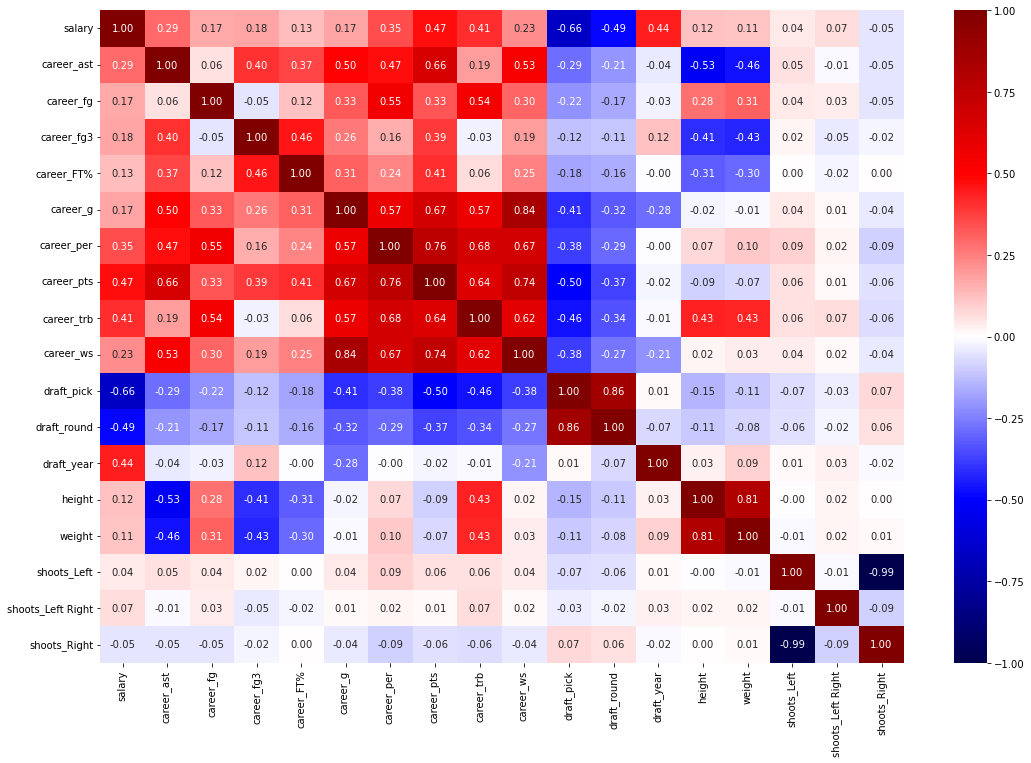

In [50]:
plt.figure(figsize=[18,12])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.2f');

In [51]:
df2=df[["salary","career_pts","career_trb","draft_pick","career_per", "draft_year"]]

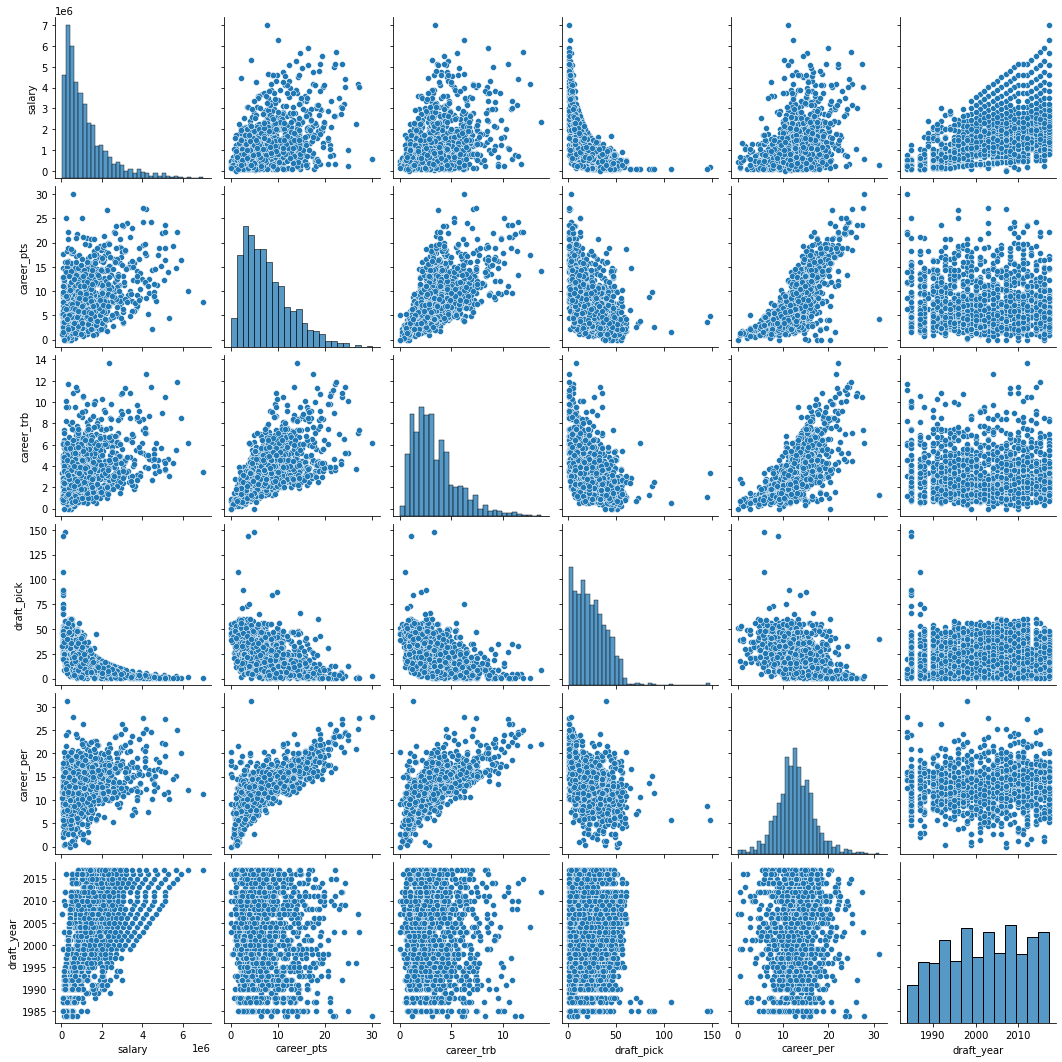

In [52]:
sns.pairplot(df2)

In [53]:
df["salary"] = np.log(df['salary'])

In [54]:
df2=df[["salary","career_pts","career_trb","draft_pick","career_per", "draft_year"]]

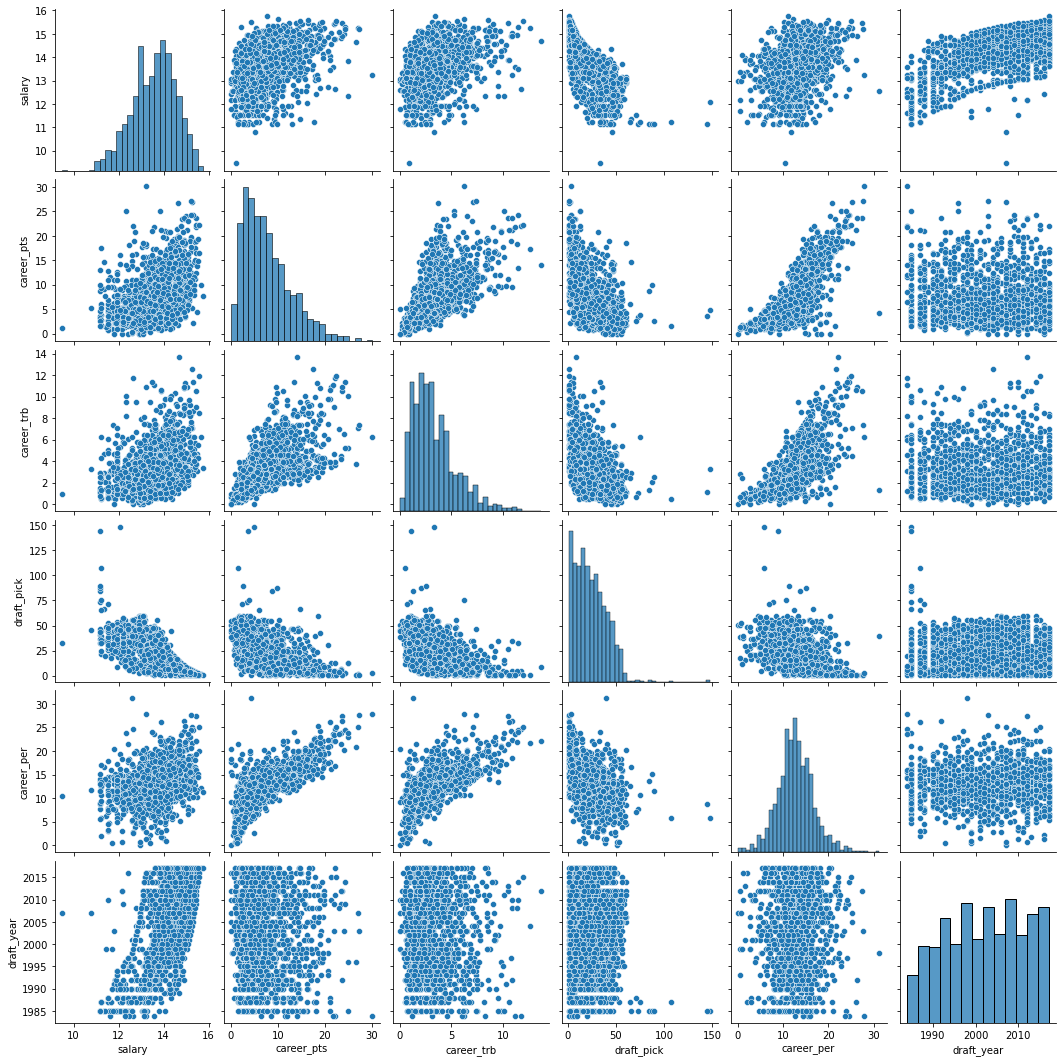

In [55]:
sns.pairplot(df2)

In [56]:
df.head()

,salary,career_ast,career_fg,career_fg3,career_FT%,career_g,career_per,career_pts,career_trb,career_ws,draft_pick,draft_round,draft_year,height,weight,shoots_Left,shoots_Left Right,shoots_Right
0,12.886641,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,25,1,1990,208.28,240,0,0,1
1,14.322328,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,3,1,1990,185.42,162,0,0,1
2,14.019985,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,11,1,1997,198.12,223,0,0,1
3,14.597584,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,3,1,1996,205.74,225,0,0,1
4,12.896120,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,0.2,60,2,2005,195.58,185,0,0,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   salary             1309 non-null   float64
 1   career_ast         1309 non-null   float64
 2   career_fg          1309 non-null   float64
 3   career_fg3         1309 non-null   float64
 4   career_FT%         1309 non-null   float64
 5   career_g           1309 non-null   int64  
 6   career_per         1309 non-null   float64
 7   career_pts         1309 non-null   float64
 8   career_trb         1309 non-null   float64
 9   career_ws          1309 non-null   float64
 10  draft_pick         1309 non-null   int64  
 11  draft_round        1309 non-null   int64  
 12  draft_year         1309 non-null   int64  
 13  height             1309 non-null   float64
 14  weight             1309 non-null   int64  
 15  shoots_Left        1309 non-null   uint8  
 16  shoots_Left Right  1309 

In [58]:
df

,salary,career_ast,career_fg,career_fg3,career_FT%,career_g,career_per,career_pts,career_trb,career_ws,draft_pick,draft_round,draft_year,height,weight,shoots_Left,shoots_Left Right,shoots_Right
0,12.886641,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,25,1,1990,208.28,240,0,0,1
1,14.322328,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,3,1,1990,185.42,162,0,0,1
2,14.019985,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,11,1,1997,198.12,223,0,0,1
3,14.597584,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,3,1,1996,205.74,225,0,0,1
4,12.896120,0.5,37.0,32.0,50.0,30,8.5,2.7,1.0,0.2,60,2,2005,195.58,185,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,14.262194,0.9,50.9,28.6,76.4,412,14.9,7.0,4.4,17.1,17,1,2012,213.36,253,0,0,1
1305,13.309672,0.2,40.8,25.0,78.3,135,8.7,3.4,2.1,0.8,22,1,1995,213.36,250,0,0,1
1306,13.764217,0.2,32.3,0.0,60.0,19,7.3,1.2,1.8,0.0,41,2,2016,213.36,240,1,0,0
1307,13.527828,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,48,2,2016,203.20,215,0,0,1


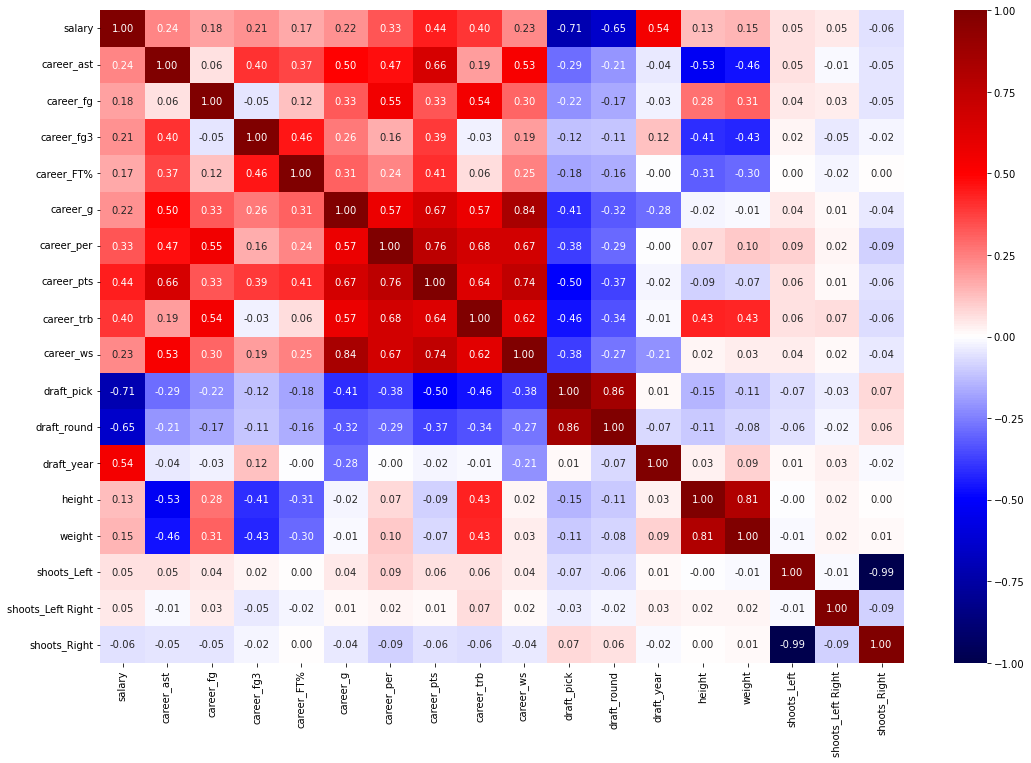

In [59]:
plt.figure(figsize=[18,12])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.2f');

In [60]:
df.isnull().sum()

salary               0
career_ast           0
career_fg            0
career_fg3           0
career_FT%           0
career_g             0
career_per           0
career_pts           0
career_trb           0
career_ws            0
draft_pick           0
draft_round          0
draft_year           0
height               0
weight               0
shoots_Left          0
shoots_Left Right    0
shoots_Right         0
dtype: int64

In [61]:
df2=df[["salary","career_pts","career_trb","draft_pick","career_per", "draft_year"]]

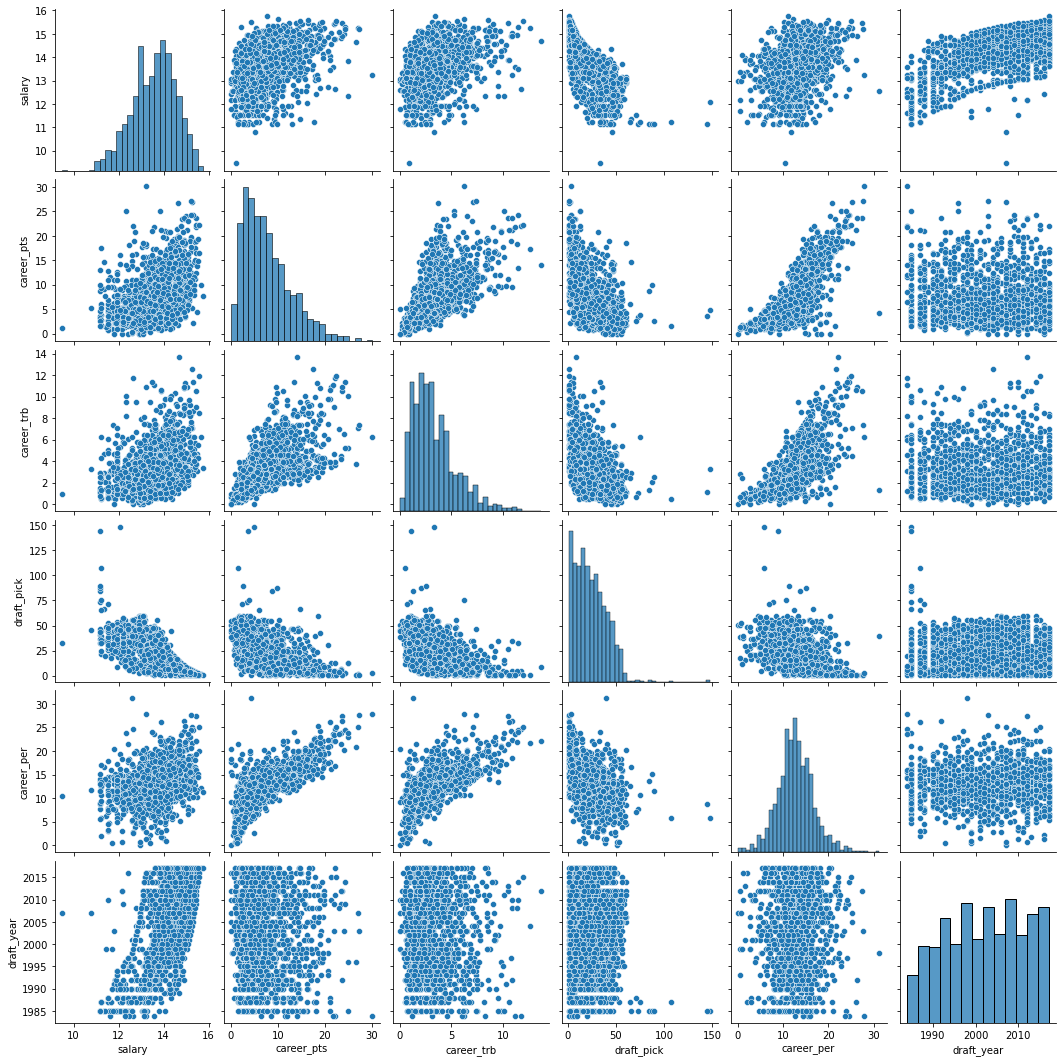

In [62]:
sns.pairplot(df2)

In [63]:
X = df[["career_pts","career_trb","draft_pick","career_per", "draft_year"]]
y= df["salary"]

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [64]:
y

0       12.886641
1       14.322328
2       14.019985
3       14.597584
4       12.896120
          ...    
1304    14.262194
1305    13.309672
1306    13.764217
1307    13.527828
1308    13.849869
Name: salary, Length: 1309, dtype: float64

In [65]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [26]:
X_train

,career_pts,career_trb,draft_pick,career_per,draft_year
1155,15.3,6.1,2,15.7,1985
964,12.5,6.9,6,13.8,1995
1127,4.7,2.2,17,8.7,1997
406,13.7,6.9,2,16.4,1987
919,8.3,3.1,11,11.6,2003
...,...,...,...,...,...
1238,6.1,2.4,65,12.5,1987
1147,0.9,0.9,48,4.9,1993
106,4.9,6.3,7,12.8,2011
1041,3.1,0.4,45,9.2,1997


In [27]:
print('X Train:', X_train.shape)
print('X Test:', x_test.shape)
print('y Train:', Y_train.shape)
print('y Test:', y_test.shape)

X Train: (1047, 5)
X Test: (262, 5)
y Train: (1047,)
y Test: (262,)


In [28]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

pred = lreg.predict(X_train)

mse = np.mean((pred - Y_train)**2)

# Hata Metrikleri
print("Train Score: ", lreg.score(X_train, Y_train))
print("MSE: ", mse)

Train Score:  0.8081488754844208
MSE:  0.17518914192802237


In [29]:
X_train=sm.add_constant(X_train)

C:\Users\abdulsamet.onay\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
mod=sm.OLS(Y_train,X_train)
res=mod.fit()

In [31]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     877.0
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:53:04   Log-Likelihood:                -573.75
No. Observations:                1047   AIC:                             1159.
Df Residuals:                    1041   BIC:                             1189.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -98.5659      2.860    -34.463      0.0

# sklearn kullanarak modelleme

In [32]:
lrl= LinearRegression()

In [33]:
x=df2.iloc[:, 1:]
y=df2.iloc[:,0]

In [34]:
lrl.fit(x,y)

LinearRegression()

In [36]:
r_squared1=lrl.score(x,y)
print("R2:", round(r_squared1,3))

R2: 0.819


In [40]:
adjusted_r_squared1=1- (1-r_squared1)*(len(y)-1)/(len(y)- x.shape[1]-1)
print("adjusted R2:", round(adjusted_r_squared1,3))

adjusted R2: 0.818


# statsmodel

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
OLS=LinearRegression()
OLS.fit(X_train,Y_train)

In [ ]:
y_pred=OLS.predict(X_test)
performance=pd.DataFrame({"Predictions":y_pred,"Actual Salary":Y_test})

In [ ]:
performance["error"]=performance["Actual Salary"]-performance["Predictions"]

In [ ]:
performance.head()

In [ ]:
performance.reset_index(drop=True,inplace=True)
performance.reset_index(inplace=True)
performance.head()

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.bar("index","error",data=performance, color="black", width=0.3)
plt.xlabel("Observations")
plt.ylabel("error")
plt.show()

In [ ]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_pred)
plt.show()

In [ ]:
sns.pairplot()

In [ ]:
y_pred=mod.predict(x_test)
performance=pd.DataFrame(y_pred,y_test)

In [ ]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

In [ ]:
lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

mse = np.mean((pred - y_cv)**2)

print("Validation Score: ", lreg.score(x_cv, y_cv))
print("MSE: ", mse)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

lreg2 = LinearRegression()

minmax_scale = MinMaxScaler()
x_train_mms = minmax_scale.fit_transform(x_train.values)
x_cv_mms = minmax_scale.fit_transform(x_cv.values)

lreg2.fit(x_train_mms,y_train)

pred = lreg2.predict(x_cv_mms)

mse = np.mean((pred - y_cv)**2)

print("Validation Score: ", lreg2.score(x_cv_mms, y_cv))
print("MSE: ", mse)

In [ ]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=1)

ridgeReg.fit(x_train_mms,y_train)

pred = ridgeReg.predict(x_cv_mms)

mse = np.mean((pred - y_cv)**2)

print("Validation Score: ", ridgeReg.score(x_cv_mms, y_cv))
print("MSE: ", mse)

In [ ]:
ridgeReg2 = Ridge(alpha=100)

ridgeReg2.fit(x_train_mms,y_train)

pred = ridgeReg2.predict(x_cv_mms)

mse = np.mean((pred - y_cv)**2)

print("Validation Score: ", ridgeReg2.score(x_cv_mms, y_cv))
print("MSE: ", mse)

In [ ]:
ridgeReg3 = Ridge(alpha=10000)

ridgeReg3.fit(x_train_mms,y_train)

pred = ridgeReg3.predict(x_cv_mms)

mse = np.mean((pred - y_cv)**2)

print("Validation Score: ", ridgeReg3.score(x_cv_mms, y_cv))
print("MSE: ", mse)

In [ ]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=1)

lassoReg.fit(x_train_mms,y_train)

pred = lassoReg.predict(x_cv_mms)

mse = np.mean((pred - y_cv)**2)

print("Validation Score: ", lassoReg.score(x_cv_mms, y_cv))
print("MSE: ", mse)

In [ ]:
lreg3 = LinearRegression()

X_train_mms = minmax_scale.fit_transform(X_train.values)
x_test_mms = minmax_scale.fit_transform(x_test.values)

lreg3.fit(X_train_mms,Y_train)

pred = lreg3.predict(x_test_mms)

mse = np.mean((pred - y_test)**2)

print("Test Score: ", lreg3.score(x_test_mms, y_test))
print("MSE: ", mse)